<a href="https://colab.research.google.com/github/bryanvilcamarchand/Hotel-Reservation-Prediction/blob/master/Hotel_Reservation_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hotel Reservation Prediction

## Context

Nowadays, all the facilities that hotels offer to their guests in the booking  process 🛎️ result in a reduction of the closure rate. The most common reasons for booking cancellations are no penalties it, many similar offers, bad reviews by others customers in the public web, change of plan, etc.

Thhe goald of this project is create a model to predict that customers with high probabilite to confirm booking 🚀

<img src='https://quaysidehotel.co.uk/wp-content/uploads/2022/09/Reasons-to-a-room-direct-with-hotel-over-booking-via-third-party-travel-agency-1024x657.jpg' width="500" height="300">

The feature set includes:

- Booking_ID: Unique identifier of each booking.
- no_of_adults: Number of adults.
- no_of_children: Number of children.
- no_of_weekend_nights: Number of weekend nights - Saturday or Sunday.
- no_of_week_nights: Number of week nights - Monday to Friday.
- type_of_meal_plane: Type of meal plan booked by the customer.
- required_car_parking_space: Does the customer require a car parking space? - 0: No, 1: Yes.
- room_type_reserved: Type of room reserved by the customer.
- lead_time: Number of days between the date of booking and the arrival date.
- arrival_year: Year of arrival date.
-arrival_month: Month of arrival date.
- arrival_date: Date of the month.
- market_segment_type: Market segment designation.
- repeated_guest: Is the customer a repeated guest? - 0: No, 1: Yes.
- no_of_previous_cancellations: Number of previous bookings that were canceled - by the customer prior to the current booking.
- no_of_previous_bookings_not_canceled: Number of previous bookings not - canceled by the customer prior to the current booking.
- avg_price_per_room: Average price per day of the reservation, in euros; prices of the rooms are dynamic.
- no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc).
- booking_status: Flag indicating if the booking was canceled or not.

In [ ]:
#Import libreries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve # ROC a diferencia del accuracy te da un valor justo de precision para datos desbalanceados

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Python/Hotel Reservation Prediction/Hotel Reservations.csv')

In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
# Review data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
# Validate null values
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
# Descriptive analysis
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [ ]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
# Target
df["booking_status"].value_counts(normalize = True) * 100 # Not canceled 67%, Canceled 33%

Not_Canceled    67.236389
Canceled        32.763611
Name: booking_status, dtype: float64

In [ ]:
df["no_of_adults"].value_counts(normalize = True) * 100 # 72% times the booking is for 2 persons

2    71.972433
1    21.212957
3     6.387319
0     0.383184
4     0.044108
Name: no_of_adults, dtype: float64

In [ ]:
df["no_of_children"].value_counts(normalize = True) * 100  # 92% times the booking doesn't have children

0     92.562371
1      4.460372
2      2.916609
3      0.052378
9      0.005513
10     0.002757
Name: no_of_children, dtype: float64

In [ ]:
df["no_of_weekend_nights"].value_counts(normalize = True) * 100 # 46% times the booking is not in the weekend.

0    46.511371
1    27.553411
2    25.006203
3     0.421778
4     0.355617
5     0.093728
6     0.055134
7     0.002757
Name: no_of_weekend_nights, dtype: float64

In [ ]:
df["no_of_week_nights"].value_counts(normalize = True) * 100 # 80% times the booking have only 3 days of week from Monday to Friday.

2     31.547898
1     26.155755
3     21.609924
4      8.242591
0      6.580289
5      4.449345
6      0.521020
7      0.311509
10     0.170917
8      0.170917
9      0.093728
11     0.046864
15     0.027567
12     0.024810
14     0.019297
13     0.013784
17     0.008270
16     0.005513
Name: no_of_week_nights, dtype: float64

In [ ]:
df["type_of_meal_plan"].value_counts(normalize = True) * 100 # 86% customer pay for a meal plan.

Meal Plan 1     76.733287
Not Selected    14.141971
Meal Plan 2      9.110958
Meal Plan 3      0.013784
Name: type_of_meal_plan, dtype: float64

In [ ]:
df["required_car_parking_space"].value_counts(normalize = True) * 100 # Almost all customer doesn't need car parking

0    96.901447
1     3.098553
Name: required_car_parking_space, dtype: float64

In [ ]:
df["room_type_reserved"].value_counts(normalize = True) * 100 # The most popular room type are room type 1 and room type 4.

Room_Type 1    77.546520
Room_Type 4    16.697450
Room_Type 6     2.662991
Room_Type 2     1.907650
Room_Type 5     0.730531
Room_Type 7     0.435562
Room_Type 3     0.019297
Name: room_type_reserved, dtype: float64

<Axes: xlabel='lead_time', ylabel='Count'>

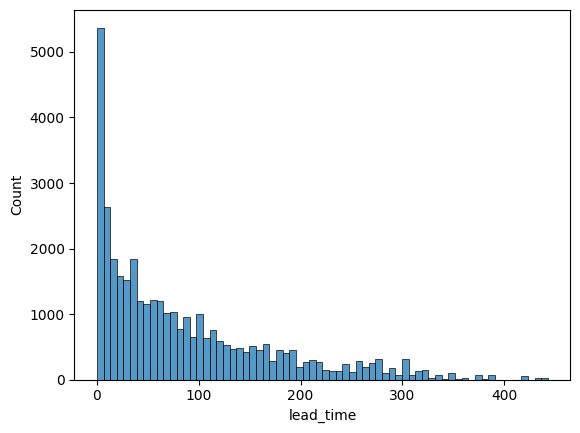

In [ ]:
sns.histplot(data = df, x = "lead_time") # Many people book and arrive at the hotel in less than 90 days (3 months).

In [ ]:
df["arrival_year"].value_counts(normalize = True) * 100

2018    82.042729
2017    17.957271
Name: arrival_year, dtype: float64

In [ ]:
df["arrival_month"].value_counts(normalize = True) * 100 # There isn't a speciall day of month to book

10    14.657478
9     12.711234
8     10.511371
6      8.829773
12     8.328050
11     8.215024
7      8.049621
4      7.542385
5      7.161957
3      6.500345
2      4.697450
1      2.795314
Name: arrival_month, dtype: float64

In [ ]:
df["market_segment_type"].value_counts(normalize = True) * 100 # The most popular channel to book is Online (63%).

Online           63.994487
Offline          29.022743
Corporate         5.560303
Complementary     1.077877
Aviation          0.344590
Name: market_segment_type, dtype: float64

In [ ]:
df["repeated_guest"].value_counts(normalize = True) * 100 # Almost all customers visit the hotel for the first time.

0    97.436251
1     2.563749
Name: repeated_guest, dtype: float64

In [ ]:
df["no_of_previous_cancellations"].value_counts(normalize = True) * 100 # Almost all customers visit the hotel for the first time.

0     99.068229
1      0.545830
2      0.126809
3      0.118539
11     0.068918
5      0.030324
4      0.027567
13     0.011027
6      0.002757
Name: no_of_previous_cancellations, dtype: float64

In [ ]:
df["no_of_previous_bookings_not_canceled"].value_counts(normalize = True) * 100 # Almost all customers visit the hotel for the first time.

0     97.761544
1      0.628532
2      0.308753
3      0.220538
4      0.179187
5      0.165403
6      0.099242
7      0.066161
8      0.063405
10     0.052378
9      0.052378
11     0.041351
12     0.033081
14     0.024810
15     0.022054
16     0.019297
13     0.019297
18     0.016540
20     0.016540
21     0.016540
17     0.016540
19     0.016540
22     0.016540
25     0.008270
27     0.008270
24     0.008270
23     0.008270
44     0.005513
29     0.005513
48     0.005513
28     0.005513
30     0.005513
32     0.005513
31     0.005513
26     0.005513
46     0.002757
55     0.002757
45     0.002757
57     0.002757
53     0.002757
54     0.002757
58     0.002757
41     0.002757
40     0.002757
43     0.002757
35     0.002757
50     0.002757
56     0.002757
33     0.002757
37     0.002757
42     0.002757
51     0.002757
38     0.002757
34     0.002757
39     0.002757
52     0.002757
49     0.002757
47     0.002757
36     0.002757
Name: no_of_previous_bookings_not_canceled, dtype: float

<Axes: xlabel='avg_price_per_room'>

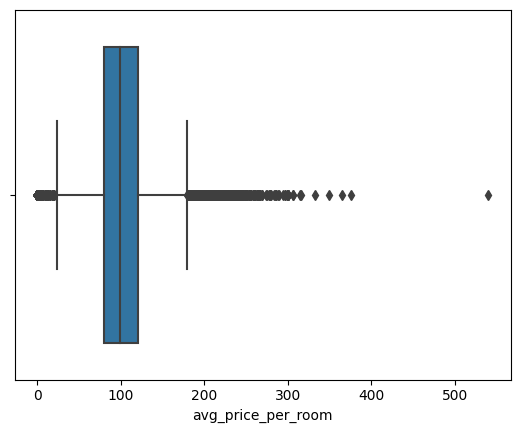

In [ ]:
sns.boxplot(data = df, x = "avg_price_per_room") # Most of the prices paid were around 100 dollars. There are high and low outliers values.

In [ ]:
df["no_of_special_requests"].value_counts(normalize = True) * 100 # 50% times the customers needs speciall something

0    54.519642
1    31.352171
2    12.030324
3     1.860786
4     0.215024
5     0.022054
Name: no_of_special_requests, dtype: float64

- Not canceled 67%, Canceled 33%. We must apply data balancing for the target variable.
- 72% times the booking is for 2 persons.
- 92% times the booking doesn't have children.
- 46% times the booking is not in the weekend.
- 80% times the booking have only 3 days of week from Monday to Friday.
- 86% customer pay for a meal plan.
- Almost all customer doesn't need car parking.
- The most popular room type are room type 1 and room type 4.
- Many people book and arrive at the hotel in less than 90 days (3 months).
- There isn't a speciall day of month to book.
- The most popular channel to book is Online (63%).
- Almost all customers visit the hotel for the first time.
- Most of the prices paid were around 100 dollars. There are high and low outliers values.
- 50% times the customers needs speciall something


## Feature Engineering

In [ ]:
label = df["booking_status"]

In [ ]:
label = label.apply(lambda x: 1 if x == "Canceled" else 0) # Yes - Canceled, No - Not Canceled

In [ ]:
df.drop("booking_status",inplace = True, axis = 1) #drop features
df.drop("Booking_ID",inplace = True, axis = 1) #drop features

<ipython-input-25-74b9c54aaec5>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")


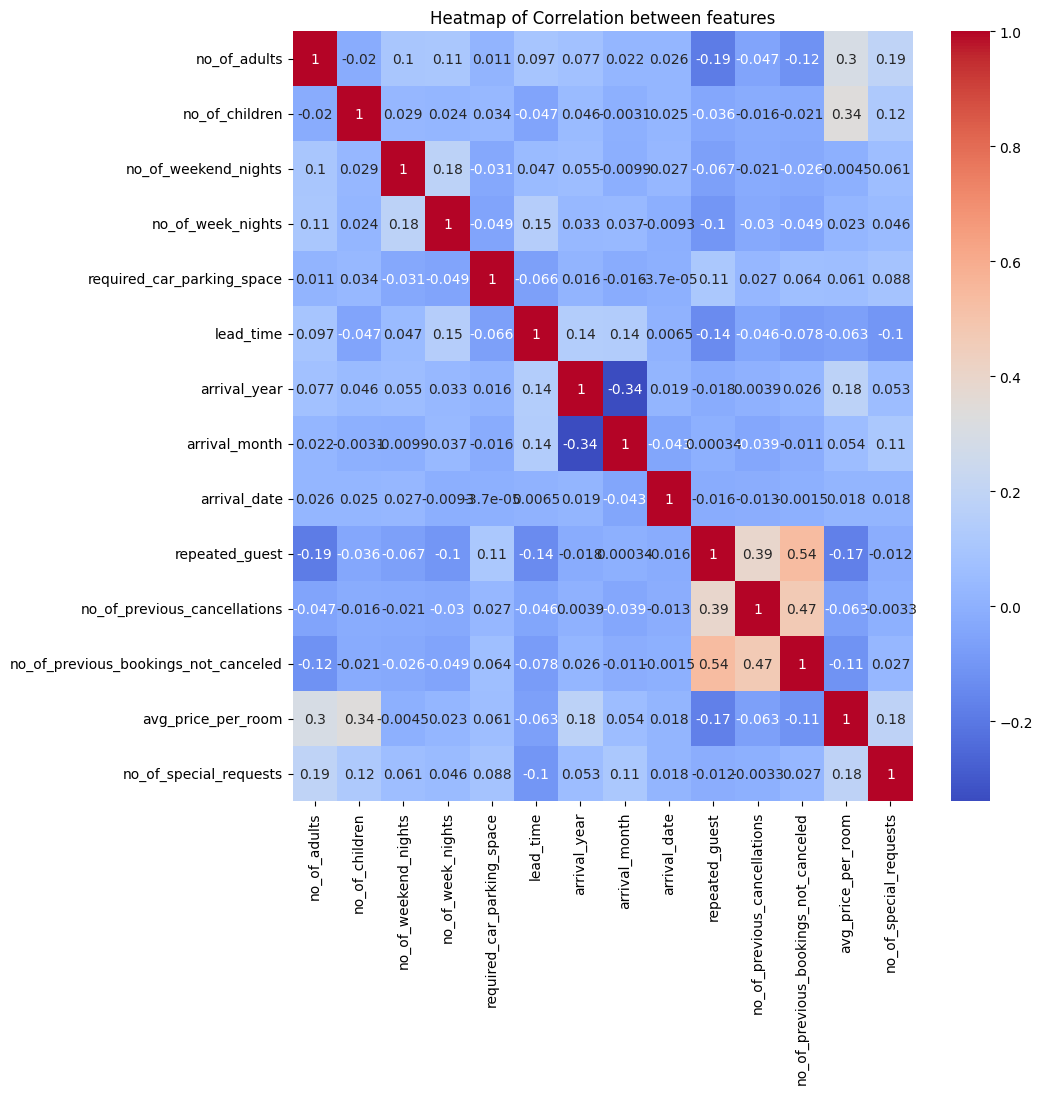

In [ ]:
# Analyze correlation
plt.figure(figsize = (10, 10))
plt.title("Heatmap of Correlation between features")
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.show()

- There is a high correlation between no_of_previous_bookings_not_canceled and repeated_guest.
- There is a high correlation between no_of_previous_bookings_not_canceled and no_of_previous_cancellations
- There is a high correlation between no_of_previous_cancellations and repeated_guest

In [ ]:
df.drop("no_of_previous_cancellations",inplace = True, axis = 1) #eliminamos la variable tenencia
df.drop("no_of_previous_bookings_not_canceled",inplace = True, axis = 1) #eliminamos la variable tenencia

<ipython-input-28-74b9c54aaec5>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")


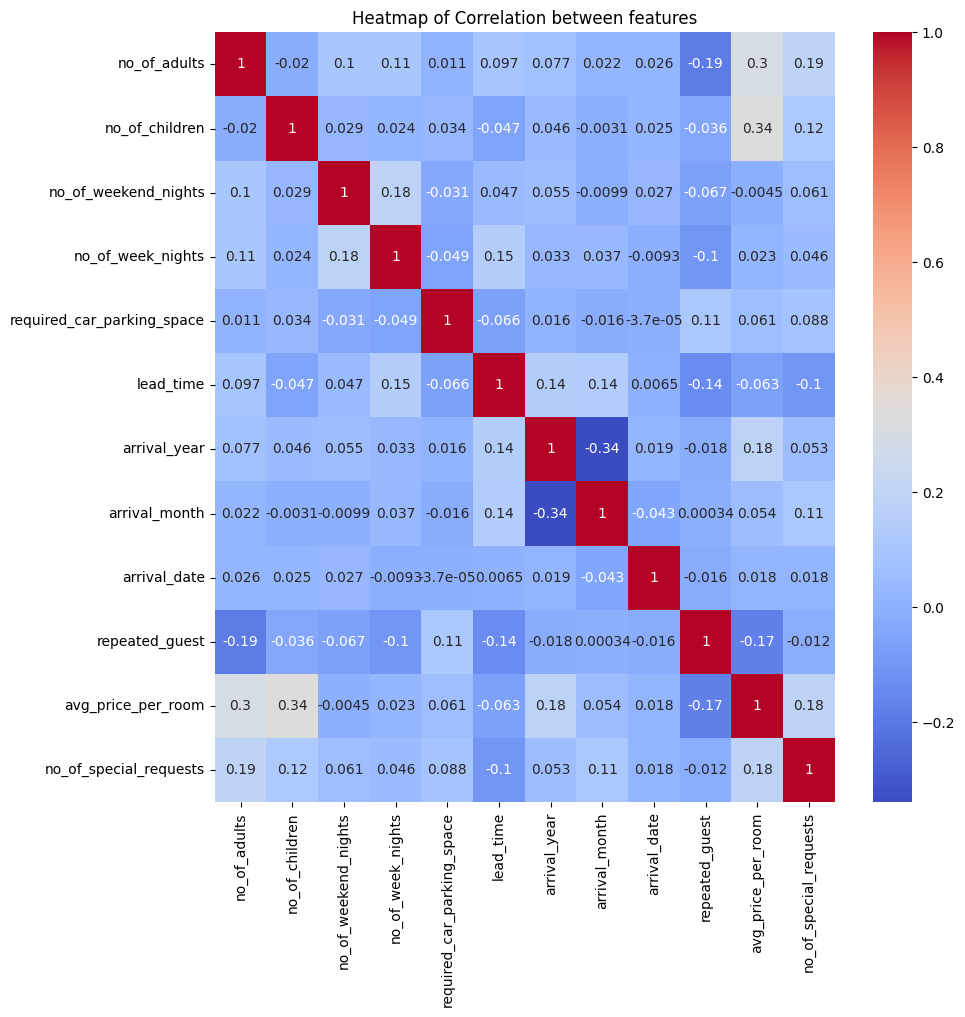

In [ ]:
# Analyze correlation
plt.figure(figsize = (10, 10))
plt.title("Heatmap of Correlation between features")
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")
plt.show()

In [ ]:
# Get dummies
df2 = pd.get_dummies(df)

In [ ]:
df2.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')

## Evaluate models

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2, label, test_size = 0.3)

We will apply the following models:
- Decision trees
- Logistic regression
- XGBoost
- Random forest

In [ ]:
def apply_classifier(clf,xTrain,xTest,yTrain,yTest):

    clf.fit(xTrain, yTrain) #Train model
    predictions = clf.predict(xTest) #Validation with test data
    conf_mtx = confusion_matrix(yTest,predictions) #Confusion matrix

    f, axes = plt.subplots(ncols=2, figsize=(15, 5))

    sns.heatmap(conf_mtx,annot=True,cbar = False,fmt = "g",ax = axes[0])
    axes[0].set_xlabel('Predicted labels')
    axes[0].set_ylabel('True labels')
    axes[0].set_title('Confusion Matrix Test');
    axes[0].xaxis.set_ticklabels(['Not Churn', 'Churn']);
    axes[0].yaxis.set_ticklabels(['Not Churn', 'Churn']);

    print(classification_report(yTest,predictions))

    roc_auc = roc_auc_score(yTest,predictions) #auc
    print ("AUC ROC : ",roc_auc) #show results


    fpr, tpr,_ = roc_curve(yTest, predictions) #ROC curve
    #fpr : false positive rate
    #tpr : true positive rate
    axes[1].plot(fpr,tpr,label= "auc="+str(roc_auc));
    axes[1].plot([0, 1], [0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')

### Decision tree model

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      7337
           1       0.79      0.81      0.80      3546

    accuracy                           0.87     10883
   macro avg       0.85      0.85      0.85     10883
weighted avg       0.87      0.87      0.87     10883

AUC ROC :  0.8547808275526904


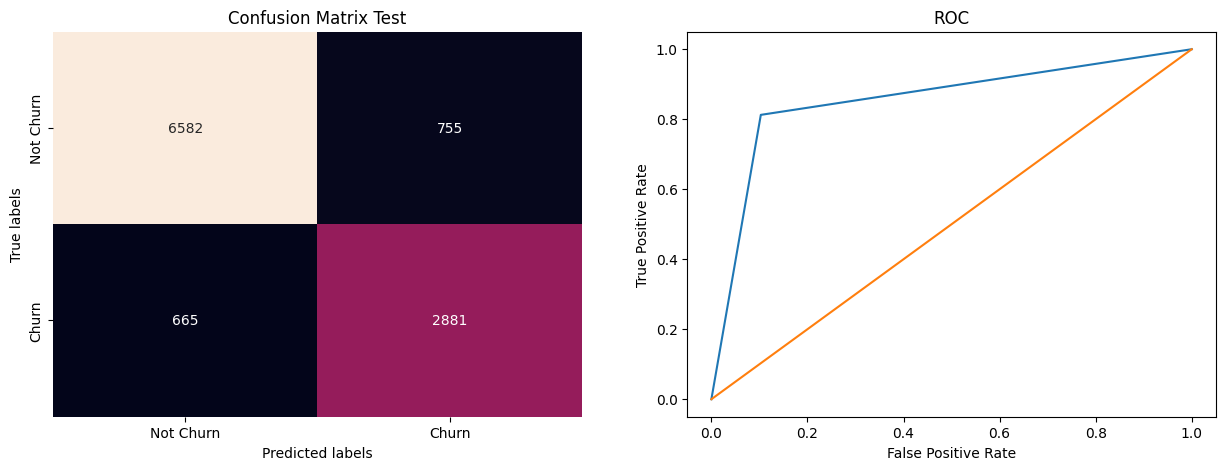

In [ ]:
decision_tree = DecisionTreeClassifier() # define model
apply_classifier(decision_tree,X_train, X_test, y_train, y_test) #Apply function

### Logistic regression model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.82      0.90      0.86      7337
           1       0.74      0.59      0.66      3546

    accuracy                           0.80     10883
   macro avg       0.78      0.75      0.76     10883
weighted avg       0.80      0.80      0.79     10883

AUC ROC :  0.747542491636815


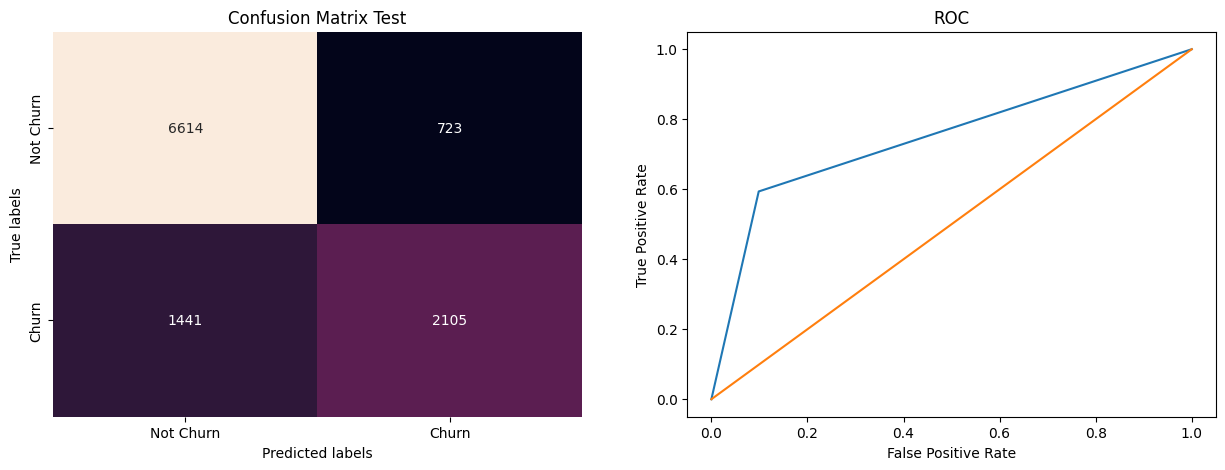

In [ ]:
logistic_reg = LogisticRegression()
apply_classifier(logistic_reg,X_train, X_test, y_train, y_test)

### Random forest model

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      7337
           1       0.87      0.81      0.84      3546

    accuracy                           0.90     10883
   macro avg       0.89      0.88      0.89     10883
weighted avg       0.90      0.90      0.90     10883

AUC ROC :  0.8782283600547058


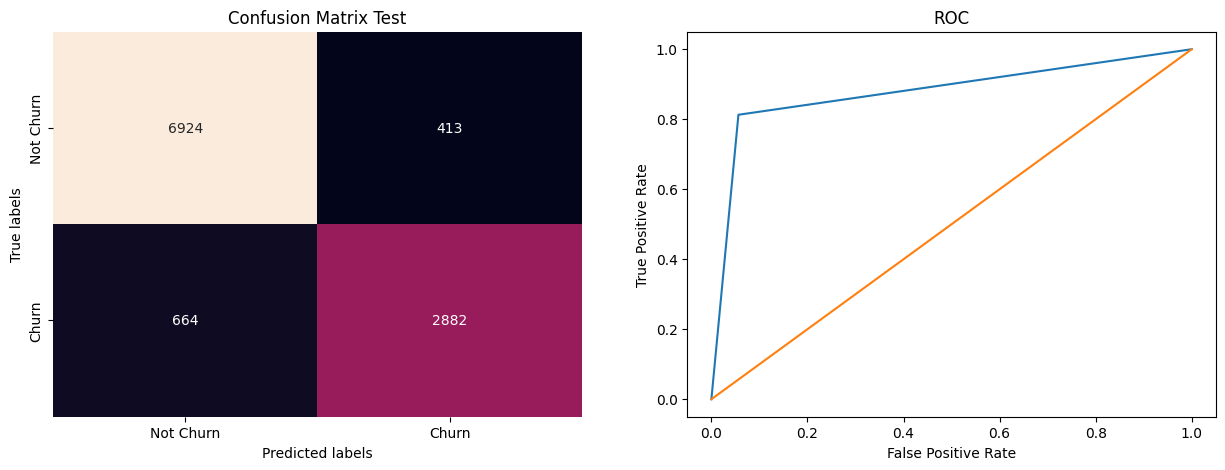

In [ ]:
random_forest = RandomForestClassifier()
apply_classifier(random_forest,X_train, X_test, y_train, y_test)

In [ ]:
## XGBoost model

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      7337
           1       0.86      0.80      0.83      3546

    accuracy                           0.89     10883
   macro avg       0.88      0.87      0.87     10883
weighted avg       0.89      0.89      0.89     10883

AUC ROC :  0.8667203085121029


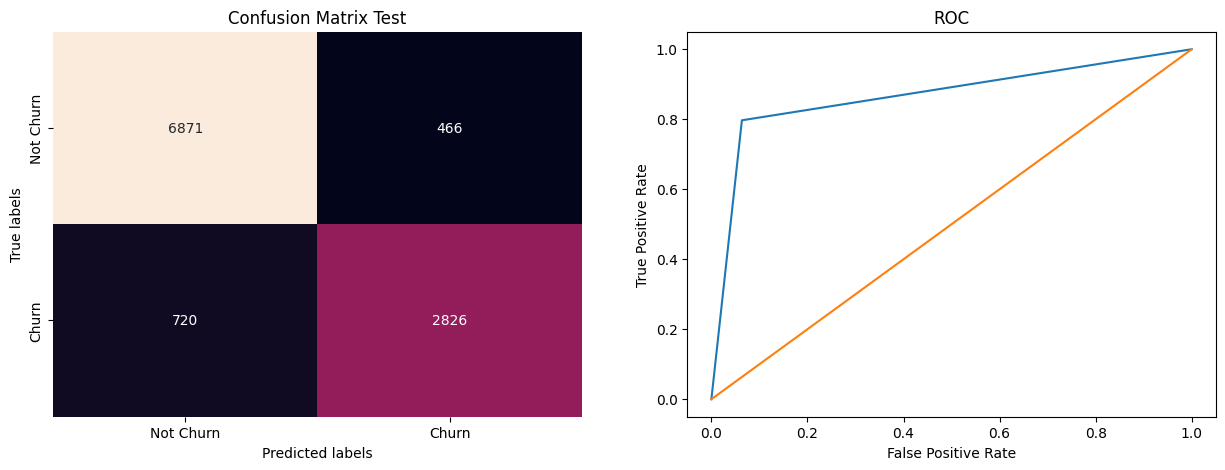

In [ ]:
xg_boost = XGBClassifier()
apply_classifier(xg_boost,X_train, X_test, y_train, y_test)

## Oversampling

### We will try to improve our results by applying oversampling of data

In [ ]:
df_original = pd.concat([df2, label], axis=1)

In [ ]:
from sklearn.utils import resample

upsample_data = df_original # Generate a copy of a original dataset

majority = upsample_data[upsample_data["booking_status"]==0] # Show category not booking cancelled
minority = upsample_data[upsample_data["booking_status"]==1] # Show category booking cancelled

In [ ]:
majority.shape, minority.shape #shape of each category

((24390, 29), (11885, 29))

In [ ]:
minority_upsampled = resample(minority, replace=True, n_samples=24390,random_state=1) # Oversampling

In [ ]:
minority_upsampled.shape

(24390, 29)

In [ ]:
del(upsample_data)
upsample_data = pd.concat([majority,minority_upsampled])

In [ ]:
upsample_data["booking_status"].value_counts() #Check the same size of each category of the target.

0    24390
1    24390
Name: booking_status, dtype: int64

In [ ]:
label_upsample = upsample_data["booking_status"]
upsample_data.drop("booking_status",inplace = True, axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_upS, X_test_upS, y_train_upS, y_test_upS = train_test_split(upsample_data, label_upsample, test_size = 0.3, random_state = 42)


## Decision tree model

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      7298
           1       0.90      0.95      0.92      7336

    accuracy                           0.92     14634
   macro avg       0.92      0.92      0.92     14634
weighted avg       0.92      0.92      0.92     14634

AUC ROC :  0.9212055752117445


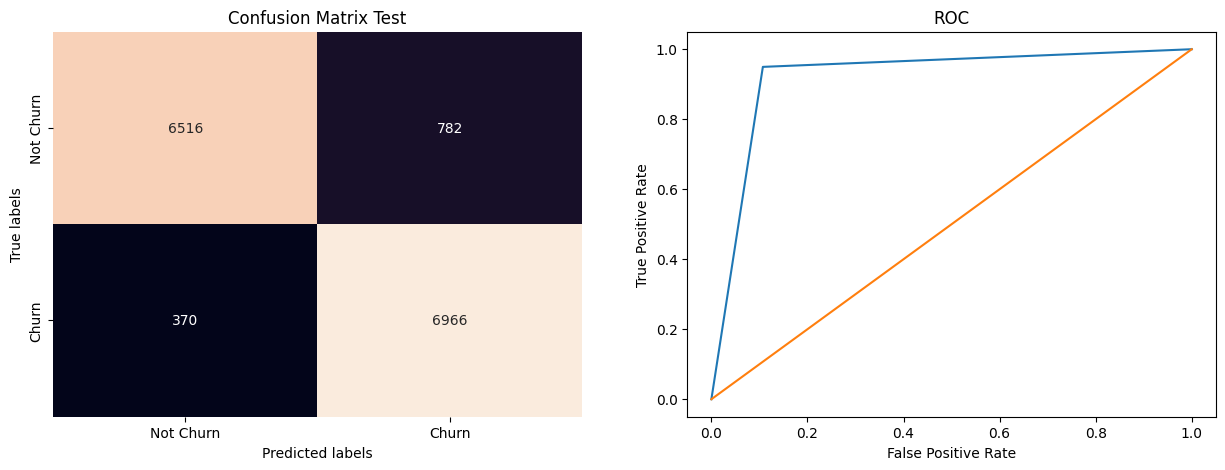

In [60]:
decision_tree_ups = DecisionTreeClassifier()
apply_classifier(decision_tree_ups,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

## Logistic regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.77      0.79      0.78      7298
           1       0.79      0.77      0.78      7336

    accuracy                           0.78     14634
   macro avg       0.78      0.78      0.78     14634
weighted avg       0.78      0.78      0.78     14634

AUC ROC :  0.7791713598951386


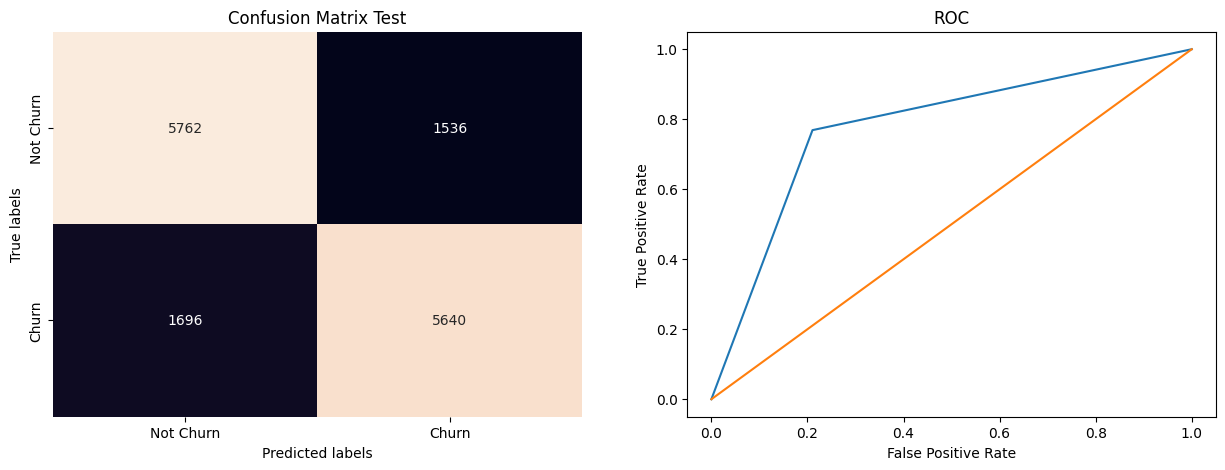

In [62]:
logistic_reg = LogisticRegression(random_state = 42)
apply_classifier(logistic_reg,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

## Random forest

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      7298
           1       0.93      0.96      0.94      7336

    accuracy                           0.94     14634
   macro avg       0.94      0.94      0.94     14634
weighted avg       0.94      0.94      0.94     14634

AUC ROC :  0.9437967648028336


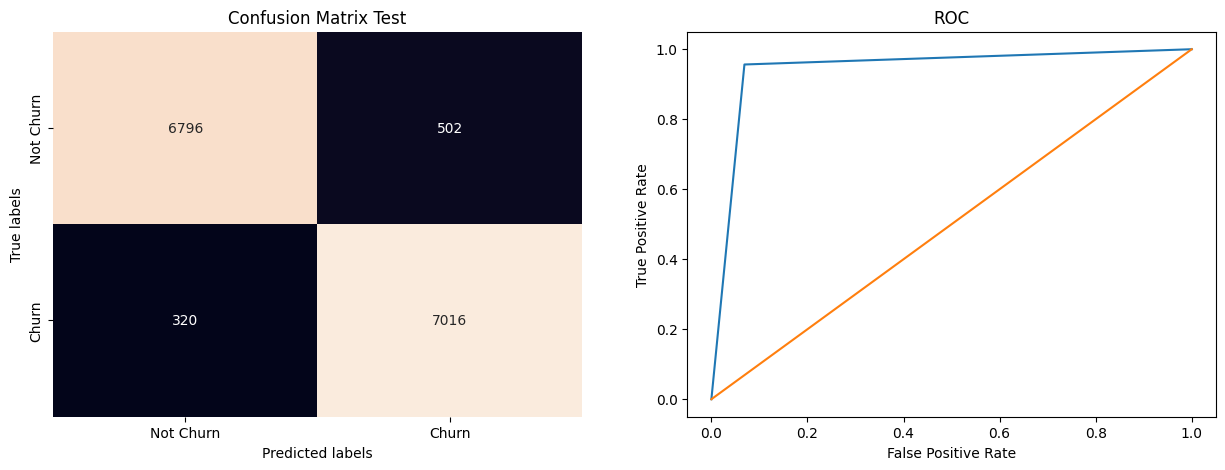

In [63]:
random_forest = RandomForestClassifier()
apply_classifier(random_forest,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

## XGboost

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      7298
           1       0.89      0.90      0.90      7336

    accuracy                           0.90     14634
   macro avg       0.90      0.90      0.90     14634
weighted avg       0.90      0.90      0.90     14634

AUC ROC :  0.8961844911723473


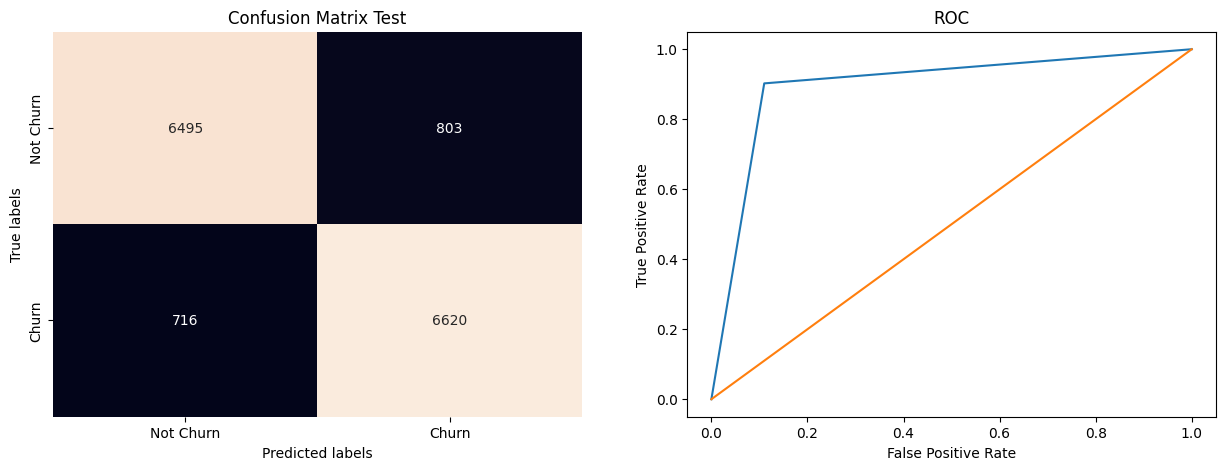

In [64]:
xg_boost = XGBClassifier(random_state = 42)
apply_classifier(xg_boost,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

We chose the "random forest with data balancing" model. It has a better AUC.